In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../dataset/WorldCupShootouts_2.csv", dtype=np.float32)
df

,Zone,Foot,Keeper,Goal
0,7.0,1.0,1.0,1.0
1,9.0,1.0,0.5,1.0
2,6.0,1.0,0.0,1.0
3,2.0,1.0,0.5,1.0
4,9.0,1.0,0.0,1.0
...,...,...,...,...
274,7.0,1.0,0.0,1.0
275,7.0,1.0,1.0,1.0
276,4.0,1.0,1.0,1.0
277,7.0,1.0,1.0,1.0


In [4]:
df.loc[:, df.columns != 'Zone'].values

array([[1. , 1. , 1. ],
       [1. , 0.5, 1. ],
       [1. , 0. , 1. ],
       [1. , 0.5, 1. ],
       [1. , 0. , 1. ],
       [1. , 0. , 0. ],
       [0. , 0. , 0. ],
       [1. , 1. , 1. ],
       [1. , 0. , 1. ],
       [1. , 0.5, 1. ],
       [1. , 0. , 0. ],
       [1. , 0.5, 1. ],
       [1. , 0. , 0. ],
       [1. , 1. , 1. ],
       [1. , 1. , 1. ],
       [1. , 1. , 1. ],
       [1. , 0. , 1. ],
       [0. , 1. , 1. ],
       [0. , 1. , 1. ],
       [1. , 1. , 0. ],
       [1. , 0. , 0. ],
       [1. , 1. , 1. ],
       [0. , 1. , 1. ],
       [0. , 0. , 1. ],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [1. , 0. , 1. ],
       [1. , 0. , 0. ],
       [1. , 0. , 1. ],
       [1. , 1. , 1. ],
       [1. , 0. , 1. ],
       [1. , 0. , 0. ],
       [1. , 1. , 1. ],
       [1. , 0. , 1. ],
       [1. , 1. , 1. ],
       [1. , 0. , 1. ],
       [0. , 1. , 1. ],
       [1. , 1. , 1. ],
       [1. , 0. , 1. ],
       [0. , 1. , 1. ],
       [0. , 1. , 1. ],
       [1. , 1. 

In [5]:
df['Zone'].values

array([7., 9., 6., 2., 9., 4., 8., 3., 9., 9., 7., 9., 4., 2., 6., 6., 8.,
       9., 4., 1., 7., 7., 1., 6., 8., 8., 7., 7., 4., 7., 9., 7., 4., 1.,
       7., 1., 5., 1., 5., 3., 2., 9., 9., 4., 7., 1., 8., 7., 6., 6., 1.,
       1., 4., 7., 7., 3., 7., 7., 6., 8., 5., 4., 8., 4., 9., 6., 7., 9.,
       7., 7., 6., 4., 1., 6., 8., 6., 1., 2., 4., 9., 2., 7., 1., 9., 3.,
       2., 9., 6., 9., 7., 4., 7., 5., 2., 4., 9., 9., 2., 4., 4., 4., 5.,
       9., 6., 6., 2., 9., 1., 6., 6., 1., 1., 7., 1., 9., 5., 7., 9., 7.,
       7., 7., 4., 9., 3., 5., 2., 2., 4., 6., 9., 5., 6., 1., 7., 2., 4.,
       2., 6., 5., 9., 6., 7., 3., 8., 9., 5., 6., 7., 6., 3., 8., 5., 3.,
       7., 7., 5., 1., 6., 2., 7., 6., 1., 4., 9., 9., 7., 9., 9., 7., 8.,
       4., 7., 7., 5., 4., 7., 6., 2., 9., 9., 1., 1., 7., 4., 3., 3., 7.,
       6., 9., 4., 9., 1., 2., 8., 7., 6., 3., 1., 1., 8., 8., 2., 9., 5.,
       4., 5., 7., 7., 6., 3., 8., 8., 7., 6., 2., 4., 3., 9., 5., 3., 7.,
       4., 1., 9., 9., 9.

In [65]:
from sklearn.model_selection import train_test_split

# Seperate the features and labels
label = df.Zone.values
features = df.loc[:, df.columns != 'Zone'].values/10

# Split into training and test set
train_x, test_x, train_y, test_y = train_test_split(features, label, test_size=0.2, random_state=42)

In [66]:
print(train_x.shape)
print(train_y.shape)

print(train_x.dtype)
print(train_y.dtype)

(223, 3)
(223,)
float32
float32


In [67]:
print(np.unique(train_y))
print(len(np.unique(train_y)))

[1. 2. 3. 4. 5. 6. 7. 8. 9.]
9


In [79]:
import torch.nn.functional as F

class Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(3, 100)
        self.fc2 = nn.Linear(100, 75)
        self.fc3 = nn.Linear(75, 50)
        self.fc4 = nn.Linear(50, 25)
        self.fc5 = nn.Linear(25, 10)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))

        x = self.fc5(x)
        
        return x

model = Model()
model

Model(
  (fc1): Linear(in_features=3, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=75, bias=True)
  (fc3): Linear(in_features=75, out_features=50, bias=True)
  (fc4): Linear(in_features=50, out_features=25, bias=True)
  (fc5): Linear(in_features=25, out_features=10, bias=True)
)

In [80]:
from torch.utils.data import DataLoader, Dataset

tr_x = torch.from_numpy(train_x).view(-1, 3)
tr_y = torch.from_numpy(train_y).type(torch.LongTensor)

te_x = torch.from_numpy(test_x).view(-1, 3)
te_y = torch.from_numpy(test_y).type(torch.LongTensor)

train = torch.utils.data.TensorDataset(tr_x, tr_y)
test = torch.utils.data.TensorDataset(te_x, te_y)

batch = 16
trainloader = DataLoader(train, batch_size = batch, shuffle = True)
testloader = DataLoader(test, batch_size = batch, shuffle = True)

In [81]:
epochs = 1010
lr = 0.001
train_loss, test_loss = [], []
steps = 100

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=lr)

In [82]:
from tqdm import tqdm

for epoch in range(epochs):
    total_loss = 0
    for i, (kick, results) in enumerate((trainloader)):
        predict = model(kick)
        loss = criterion(predict, results)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item()

    if epoch % steps == 0:
        te_loss = 0
        accuracy = 0
        with torch.no_grad():
            model.eval()
            for j, (kick, results) in enumerate(testloader):
                predict = model(kick)
                te_loss += criterion(predict, results)
        
        train_loss.append(total_loss/len(trainloader))
        test_loss.append(te_loss/len(testloader))

        model.train()

        print("Epoch: {}/{}.. ".format(epoch, epochs),
                "Training Loss: {:.3f}.. ".format(train_loss[-1]),
                "Test Loss: {:.3f}.. ".format(test_loss[-1]))

Epoch: 0/1010..  Training Loss: 2.313..  Test Loss: 2.310.. 
Epoch: 100/1010..  Training Loss: 2.029..  Test Loss: 2.161.. 
Epoch: 200/1010..  Training Loss: 1.962..  Test Loss: 2.154.. 
Epoch: 300/1010..  Training Loss: 1.897..  Test Loss: 2.191.. 
Epoch: 400/1010..  Training Loss: 1.863..  Test Loss: 2.254.. 
Epoch: 500/1010..  Training Loss: 1.861..  Test Loss: 2.257.. 
Epoch: 600/1010..  Training Loss: 1.843..  Test Loss: 2.320.. 
Epoch: 700/1010..  Training Loss: 1.832..  Test Loss: 2.335.. 
Epoch: 800/1010..  Training Loss: 1.833..  Test Loss: 2.452.. 
Epoch: 900/1010..  Training Loss: 1.823..  Test Loss: 2.444.. 
Epoch: 1000/1010..  Training Loss: 1.818..  Test Loss: 2.485.. 


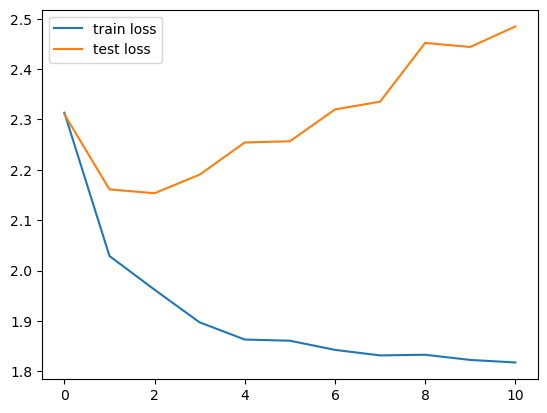

In [83]:
plt.plot(train_loss, label='train loss')
plt.plot(test_loss, label='test loss')
plt.legend()
plt.show()

In [73]:
from sklearn.metrics import accuracy_score

model.eval()

acc = 0
for j, (kick, results) in enumerate(testloader):
    predict = model(kick)
    acc += accuracy_score(results, torch.argmax(predict, axis=1))

acc = acc / (j+1)
print("%.2f" % (acc * 100), '%')

26.56 %
